### 라이브러리 선언 및 데이터 불러오기

In [1]:
# 데이터 처리 라이브러리
import pandas as pd
import numpy as np

# 머신러닝 라이브러리
from sklearn import tree
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#머신러닝 모델 예측 및 검증 라이브러리
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#머신러닝 저장 
import pickle

In [2]:
featuresData = pd.read_csv("../dataset/Real estate.csv")

In [3]:
featuresData

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


### 1. 데이터 탐색(EDA)

In [4]:
featuresData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### 2. 데이터 전처리

In [5]:
featuresData.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [6]:
featuresData.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [7]:
#순서열 삭제

In [8]:
featuresData.drop(['No'], axis=1, inplace=True)

In [9]:
featuresData

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [10]:
#컬럼명 변경

In [11]:
featuresData.columns = ["transactionDate", 'houseAge','distanceToTheNearestMRTStation', 'numberOfConvenienceStores', 'latitude','longitude','housePriceOfUnitArea']

In [12]:
featuresData

,transactionDate,houseAge,distanceToTheNearestMRTStation,numberOfConvenienceStores,latitude,longitude,housePriceOfUnitArea
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [13]:
#날짜 연도만 추출

In [14]:
featuresData["transactionDate"] = featuresData["transactionDate"].astype(int)

In [15]:
featuresData

,transactionDate,houseAge,distanceToTheNearestMRTStation,numberOfConvenienceStores,latitude,longitude,housePriceOfUnitArea
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013,8.1,104.81010,5,24.96674,121.54067,52.5


### 3. 특성선정/데이터 분리

In [16]:
# 지표 상관관계 확인

In [17]:
corrDf = featuresData.corr()
corrDf

,transactionDate,houseAge,distanceToTheNearestMRTStation,numberOfConvenienceStores,latitude,longitude,housePriceOfUnitArea
transactionDate,1.000000,0.049171,0.016519,-0.005586,0.008118,0.013177,0.081545
houseAge,0.049171,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distanceToTheNearestMRTStation,0.016519,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
numberOfConvenienceStores,-0.005586,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.008118,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,0.013177,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
housePriceOfUnitArea,0.081545,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

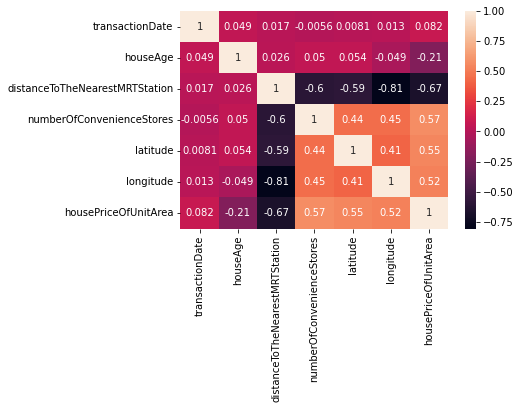

In [18]:
sns.heatmap(corrDf, annot = True )

In [19]:
#feature&label

In [20]:
stdCorr = 0.5

In [21]:
features = list( corrDf.loc[ (abs(corrDf.housePriceOfUnitArea) >= stdCorr) &
           (corrDf.housePriceOfUnitArea != 1)].index)

In [22]:
features

['distanceToTheNearestMRTStation',
 'numberOfConvenienceStores',
 'latitude',
 'longitude']

In [23]:
label = ["housePriceOfUnitArea"]

In [24]:
# 데이터분리(시간순)

In [25]:
featuresData.shape

(414, 7)

In [26]:
sortKey = ["transactionDate"]

In [27]:
featuresData.transactionDate.drop_duplicates()

0    2012
2    2013
Name: transactionDate, dtype: int32

In [28]:
sortedData = featuresData.sort_values(by = ["transactionDate"], ascending = True).reset_index(drop=True)
sortedData

,transactionDate,houseAge,distanceToTheNearestMRTStation,numberOfConvenienceStores,latitude,longitude,housePriceOfUnitArea
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,8.0,104.81010,5,24.96674,121.54067,51.8
2,2012,7.8,104.81010,5,24.96674,121.54067,47.0
3,2012,4.6,259.66070,6,24.97585,121.54516,53.7
4,2012,0.0,185.42960,0,24.97110,121.53170,37.9
...,...,...,...,...,...,...,...
409,2013,19.2,616.40040,3,24.97723,121.53767,39.6
410,2013,11.6,390.56840,5,24.97937,121.54245,39.4
411,2013,16.1,815.93140,4,24.97886,121.53464,35.6
412,2013,24.0,4527.68700,0,24.94741,121.49628,14.4


In [29]:
stdYear = 2012

In [30]:
sortedData.loc[sortedData.transactionDate == stdYear ].count()

transactionDate                   126
houseAge                          126
distanceToTheNearestMRTStation    126
numberOfConvenienceStores         126
latitude                          126
longitude                         126
housePriceOfUnitArea              126
dtype: int64

In [31]:
# 전체데이터 7:3 분리

In [32]:
stdRatio = 0.7
stdIndex = int(featuresData.shape[0] * stdRatio) #열 인덱스[1], 열 인덱스[0]
stdIndex

289

In [33]:
trainingDataFeatures = featuresData.loc[0:stdIndex, features] #문제지
trainingDataLabel = featuresData.loc[0:stdIndex, label] #정답
testDataFeatures = featuresData.loc[stdIndex+1 :, features] #문제지
testDataLabel = featuresData.loc[stdIndex+1 :, label] #정답

In [34]:
print ( trainingDataFeatures.shape )
print ( trainingDataLabel.shape )
print ( testDataFeatures.shape )
print ( testDataLabel.shape )

(290, 4)
(290, 1)
(124, 4)
(124, 1)


In [35]:
# 7:3분리 -> 연도별 분리

In [36]:
trainingDataFeatures = featuresData.loc[featuresData.transactionDate > stdYear, features]
trainingDataLabel = featuresData.loc[featuresData.transactionDate > stdYear, label]
testDataFeatures = featuresData.loc[featuresData.transactionDate == stdYear, features]
testDataLabel = featuresData.loc[featuresData.transactionDate == stdYear, label]

In [37]:
print ( trainingDataFeatures.shape )
print ( trainingDataLabel.shape )
print ( testDataFeatures.shape )
print ( testDataLabel.shape )

(288, 4)
(288, 1)
(126, 4)
(126, 1)


### 4. 모델 적용

In [38]:
# 모델 선언

In [39]:
dtModel = tree.DecisionTreeRegressor(random_state=8)

In [40]:
# 모델 적용

In [41]:
dtModel.fit(X=trainingDataFeatures,
            y=trainingDataLabel)

DecisionTreeRegressor(random_state=8)

In [42]:
dpi = 100
width_inches = 150 / dpi
height_inches = 8 / dpi

plt.figure(figsize=(width_inches, height_inches))

<Figure size 108x5.76 with 0 Axes>

<Figure size 108x5.76 with 0 Axes>

[Text(192.76632449127908, 211.04470588235293, 'X[0] <= 810.311\nmse = 196.072\nsamples = 288\nvalue = 38.713'),
 Text(97.23940770348838, 198.25411764705882, 'X[0] <= 330.03\nmse = 129.019\nsamples = 183\nvalue = 46.033'),
 Text(52.13677325581396, 185.4635294117647, 'X[3] <= 121.544\nmse = 153.139\nsamples = 80\nvalue = 51.73'),
 Text(32.03633720930233, 172.6729411764706, 'X[1] <= 7.5\nmse = 147.268\nsamples = 73\nvalue = 50.671'),
 Text(9.570348837209304, 159.88235294117646, 'X[2] <= 24.956\nmse = 149.39\nsamples = 51\nvalue = 48.282'),
 Text(7.840116279069768, 147.09176470588235, 'mse = 0.0\nsamples = 1\nvalue = 26.9'),
 Text(11.300581395348837, 147.09176470588235, 'X[3] <= 121.53\nmse = 143.051\nsamples = 50\nvalue = 48.71'),
 Text(3.46046511627907, 134.30117647058825, 'X[0] <= 170.055\nmse = 82.629\nsamples = 3\nvalue = 37.533'),
 Text(1.730232558139535, 121.51058823529411, 'mse = 0.0\nsamples = 1\nvalue = 50.2'),
 Text(5.190697674418605, 121.51058823529411, 'X[2] <= 24.974\nmse = 3

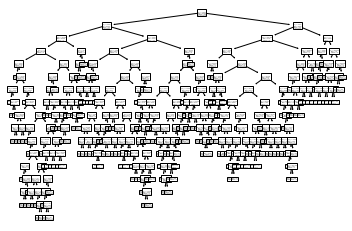

In [43]:
plot_tree(dtModel)

### 5. 예측/검증

In [65]:
testDataFeatures.shape

(126, 4)

In [68]:
# 테스트데이터라벨 예측값

In [66]:
predictValueDt = dtModel.predict( X = testDataFeatures )
len(predictValueDt)

126

In [69]:
# 테스트데이터라벨 예측값과 테스트데이터라벨 값 

In [70]:
testDataLabel["DT_PREDICT"] = predictValueDt

In [71]:
finalValue = testDataLabel

In [72]:
finalValue

,housePriceOfUnitArea,DT_PREDICT
0,37.9,46.600000
1,42.2,78.300000
4,43.1,45.300000
5,32.1,27.700000
6,40.3,42.300000
...,...,...
399,37.3,29.300000
402,28.5,33.100000
403,39.7,47.300000
405,37.2,60.700000


In [ ]:
#정확도 산출

### 6. 미래예측

In [47]:
features

['distanceToTheNearestMRTStation',
 'numberOfConvenienceStores',
 'latitude',
 'longitude']

In [48]:
distanceToTheNearestMRTStation = 600
numberOfConvenienceStores = 3
latitude = 56
longitude = 23

In [49]:
testData = pd.DataFrame( [ [distanceToTheNearestMRTStation, numberOfConvenienceStores, latitude, longitude] ] )

In [50]:
dtModel.predict(testData)

array([46.6])

In [57]:
# 파일로 저장
with open('dtModel.pkl', 'wb') as f:
    pickle.dump(dtModel, f)
    

In [58]:
# 파일 불러오기
with open('dtModel.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [59]:
print(loaded_dict)

DecisionTreeRegressor(random_state=8)
